# Exercise 07 : Heatmap

- analyze only the users and not the admins
- you can choose the color palette that you like for both of the graphs that you will need to draw in - - this exercise
- use the table checker for your query
- use absolute values of the commits, not the averages
- sort the dataframes by the total number of commits made by a user

In [1]:
import sqlite3
import pandas as pd

connection = sqlite3.connect('../data/logs.db')
cursor = connection.cursor()
cursor.execute("ATTACH DATABASE '../data/checking-logs.sqlite' AS logs")
connection.commit()

checker_query = """
SELECT timestamp, uid
FROM checker
WHERE uid LIKE 'user_%'
"""
timestamp = pd.io.sql.read_sql(checker_query, connection)
df = pd.DataFrame(timestamp)

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day'] = pd.Categorical(df['day'], categories=days_order, ordered=True)

hour_count = df.pivot_table(index='uid',columns='hour', values='timestamp', aggfunc='count', fill_value=0, observed=False)
hour_count['total'] = hour_count.sum(axis=1)
hour = hour_count.sort_values(by='total', ascending=False)
hour = hour.drop(columns=['total'])
hour = hour.reindex(columns=range(24), fill_value=0)


weekdays = df.pivot_table(index='uid',columns='day', values='timestamp', aggfunc='count', fill_value=0, observed=False)
weekdays['total'] = weekdays.sum(axis=1)
weekdays = weekdays.sort_values(by='total', ascending=False)
weekdays = weekdays.drop(columns=['total'])  # Drop the 'total' column
connection.close()

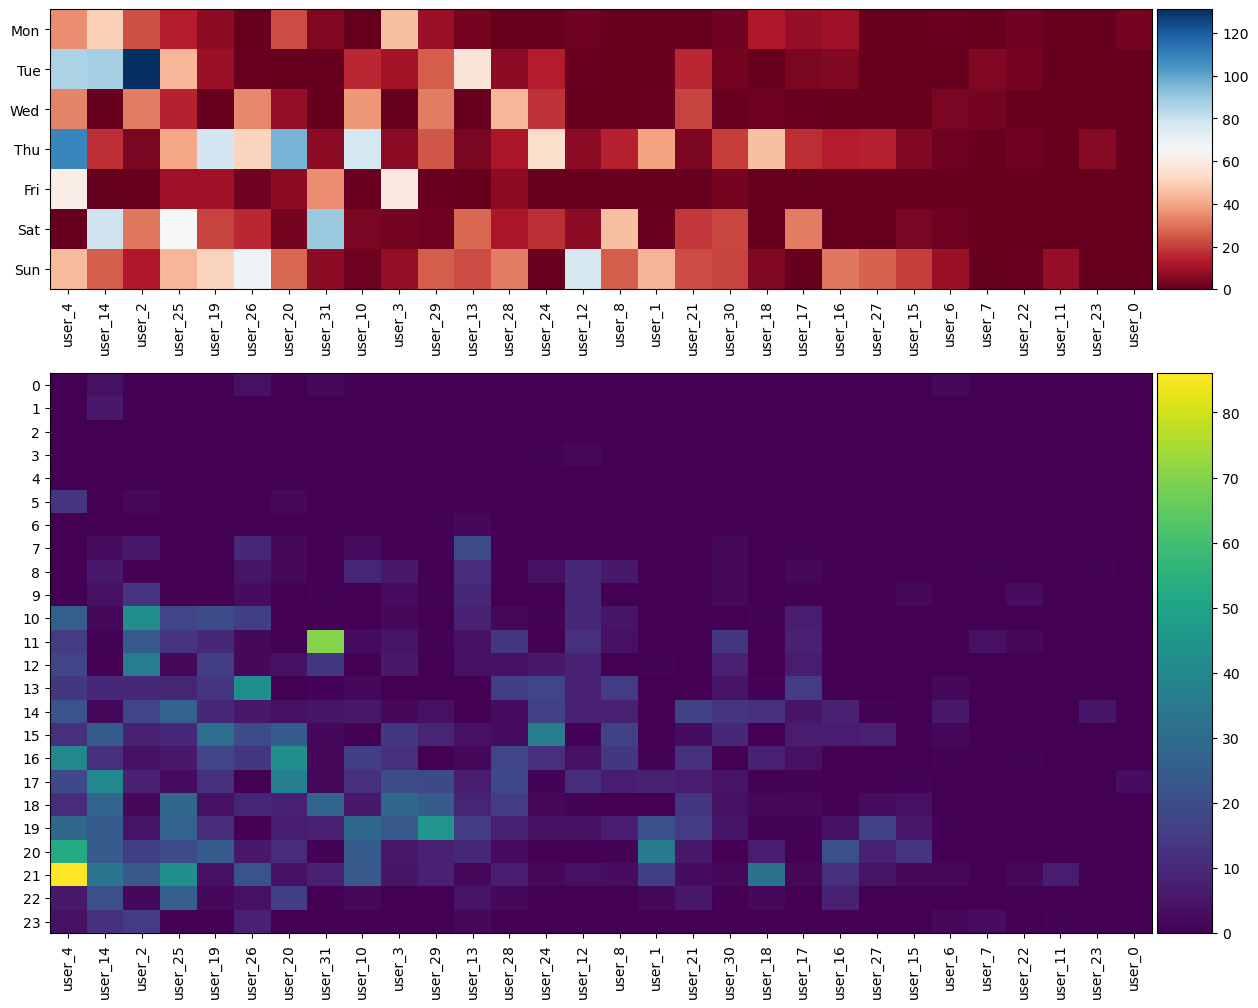

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), gridspec_kw={'height_ratios': [1, 2]})

# Heatmap for weekdays
im1 = ax1.imshow(weekdays.T, cmap='RdBu', aspect='auto')
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax1)
ax1.set_xticks(range(len(weekdays.index)))
ax1.set_xticklabels(weekdays.index, rotation=90)
ax1.set_yticks(range(len(weekdays.columns)))
ax1.set_yticklabels(weekdays.columns)
ax1.set_yticklabels([day[:3] for day in weekdays.columns])  # Use three-letter abbreviations


# Heatmap for hours
im2 = ax2.imshow(hour.T, cmap='viridis', aspect='auto')
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax2)
ax2.set_xticks(range(len(hour.index)))
ax2.set_xticklabels(hour.index, rotation=90)
ax2.set_yticks(range(len(hour.columns)))
ax2.set_yticklabels(hour.columns)

plt.show()

### Which user has the most commits on Tue?” The answer: user_*.


user_2

### Which user has the most commits on Thu?” The answer: user_*.


user_4

### On which weekday do the users not like making a lot of commits?” The answer, for example: Mon.


fri

### Which user at which hour made the largest number of commits?” The answer, for example: user_1, 15

user_4, 21